In [78]:
''' statements to import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from IPython.display import display, HTML
import os


In [182]:
'''Adding red wine DF.
Copying red_df to red_copy
cleaning data - removing column title spaces
cleaning data - removing duplicates
'''
red_df = pd.read_csv('wine+quality/winequality-red.csv', sep = ';')

red_copy = red_df.copy()
red_copy.columns = red_copy.columns.str.replace(' ', '_')
red_copy['good_or_bad'] = red_copy.quality.apply(lambda value: 'bad' if value <= 5 else 'good')
red_copy = red_copy.drop_duplicates()
print(red_copy.shape)
print(len(red_copy))

white_color= '#c1a43c'
red_color = '#ea6e6e'
background_grey = '#ede6e6'




(1359, 13)
1359


/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

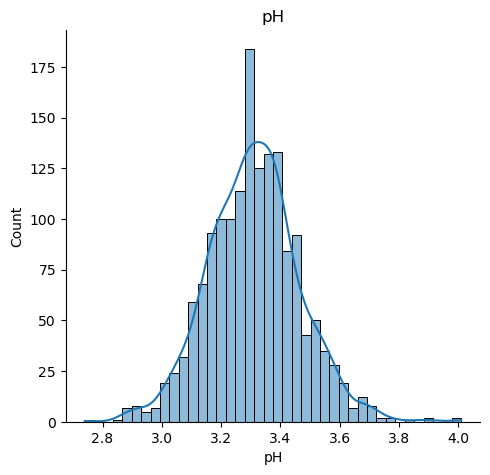

In [14]:
def dist_plot(df_column_name):
    plt.figure(figsize= (10,8))
    sns.displot(df_column_name, kde =True)
    plt.title(f'{df_column_name.name}')
    plt.subplots_adjust(top = 0.9)
    plt.show()
    
dist_plot(red_copy.pH)

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

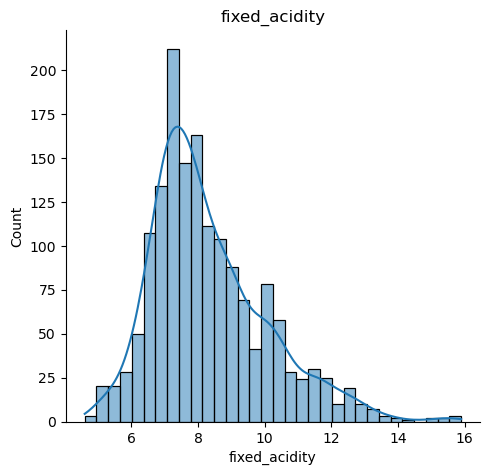

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

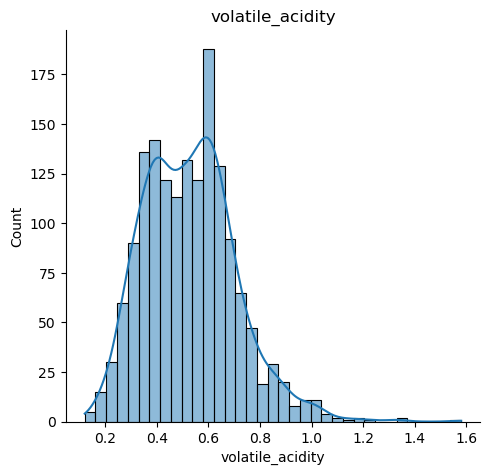

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

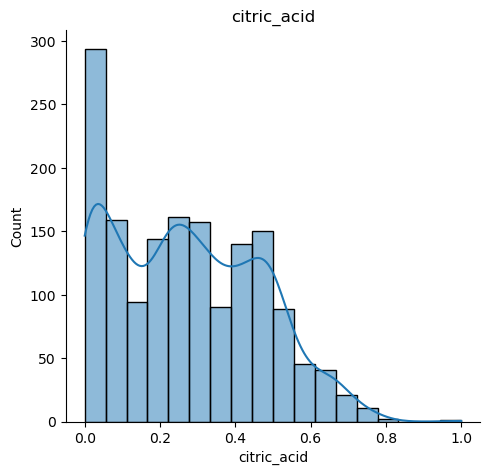

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

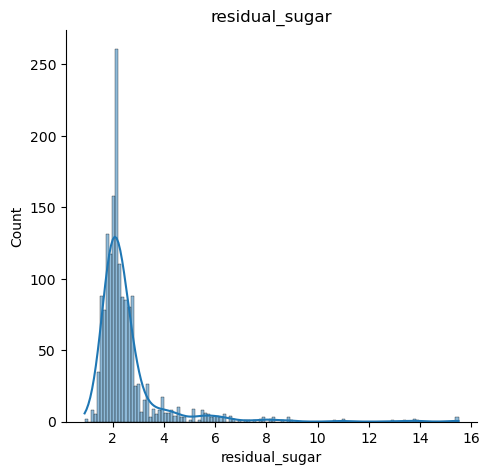

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

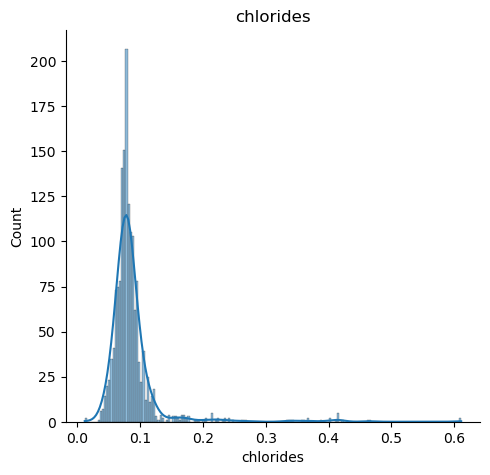

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

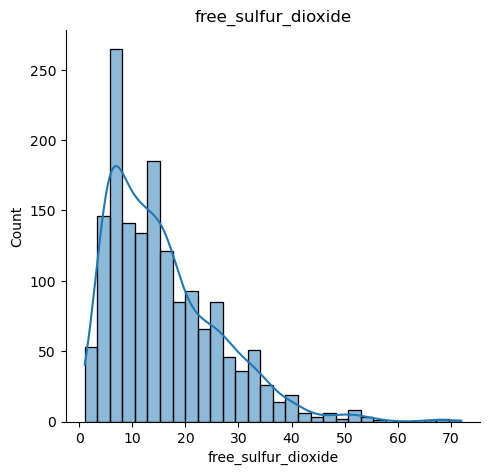

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

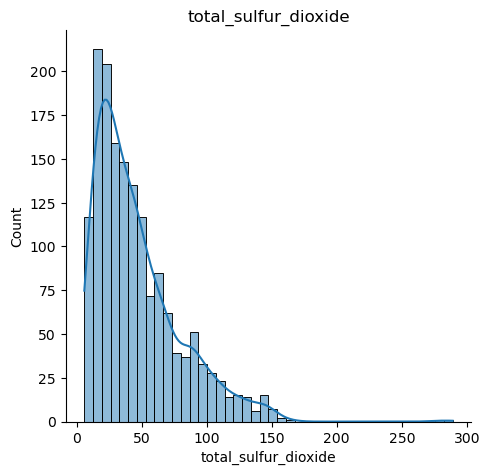

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

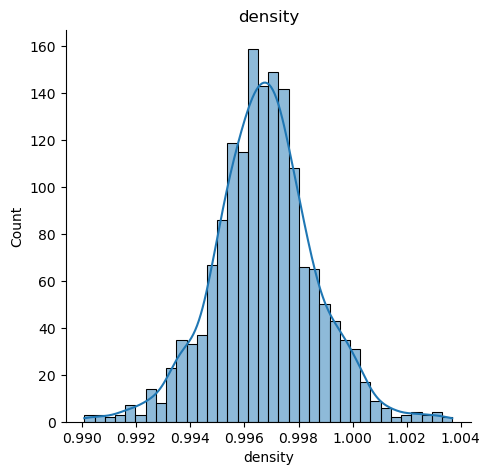

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

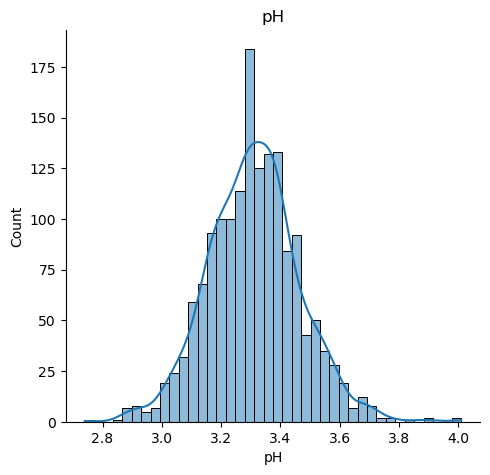

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

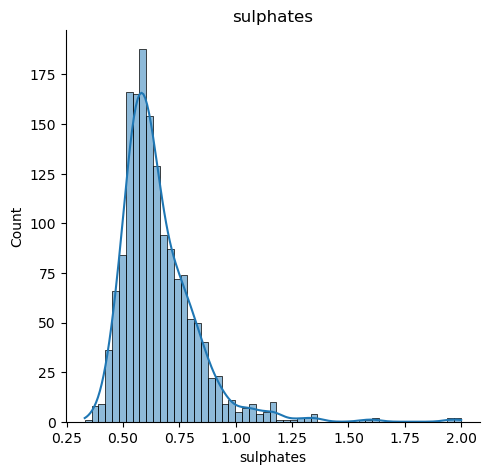

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

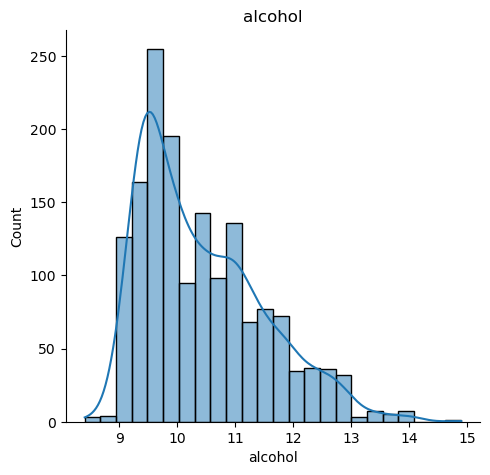

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

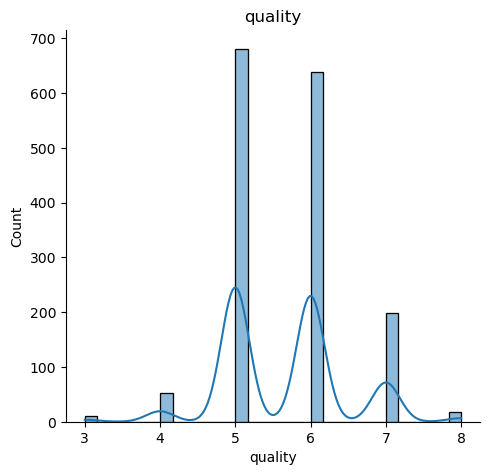

In [16]:
for val in red_copy.columns:
    try: 
        dist_plot(red_copy[val])
    except:
        pass
        

Lets break down sugar by quality

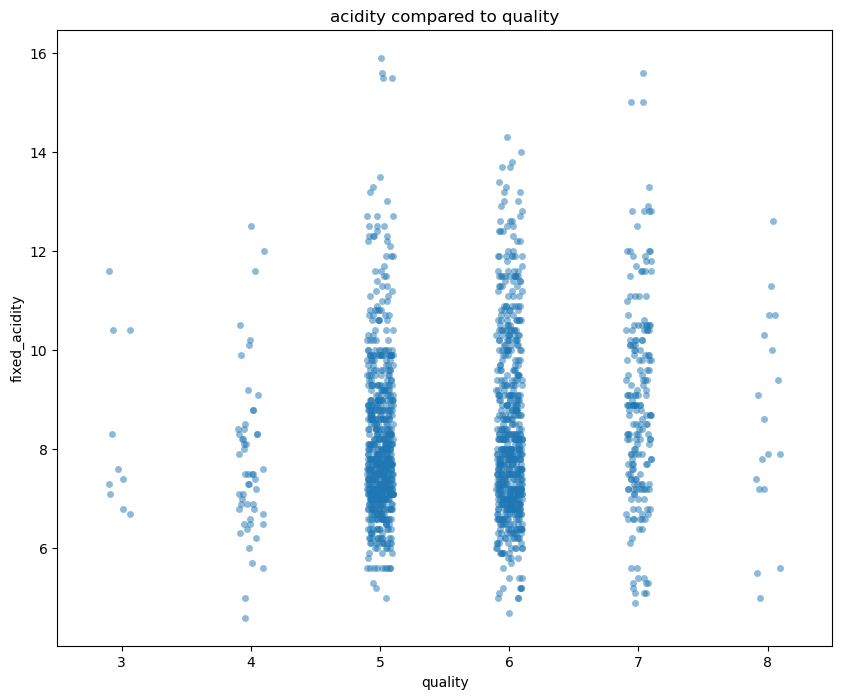

In [25]:
plt.figure(figsize=(10,8))
sns.stripplot(red_copy, x = 'quality', y='fixed_acidity', alpha = 0.5)
plt.title('acidity compared to quality')
plt.show()

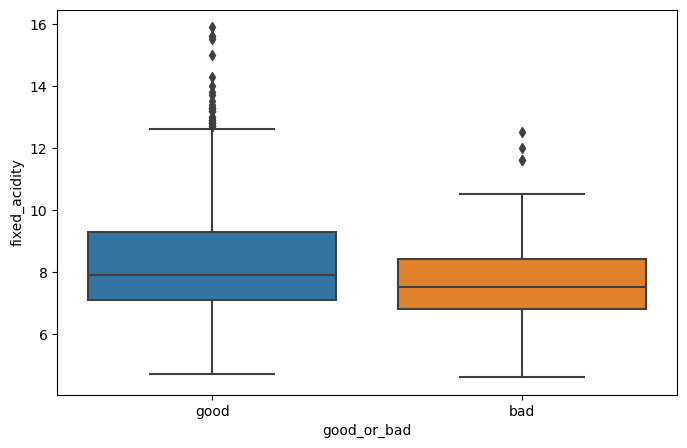

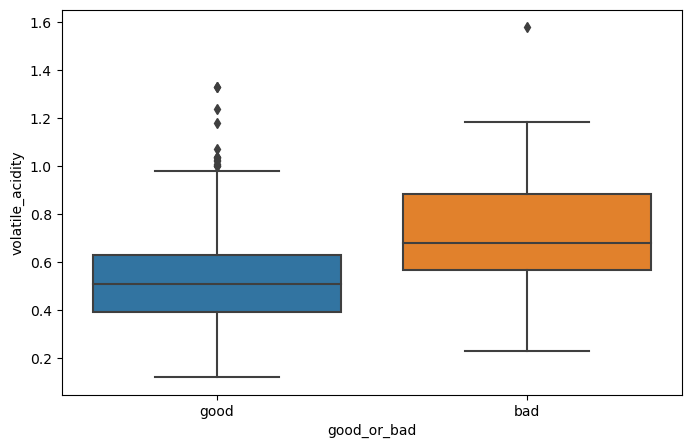

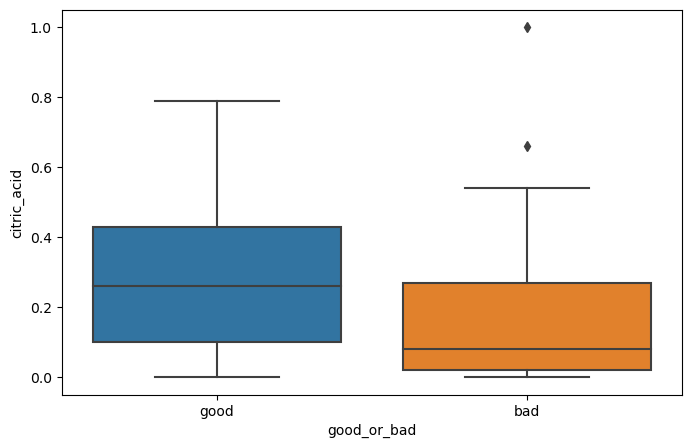

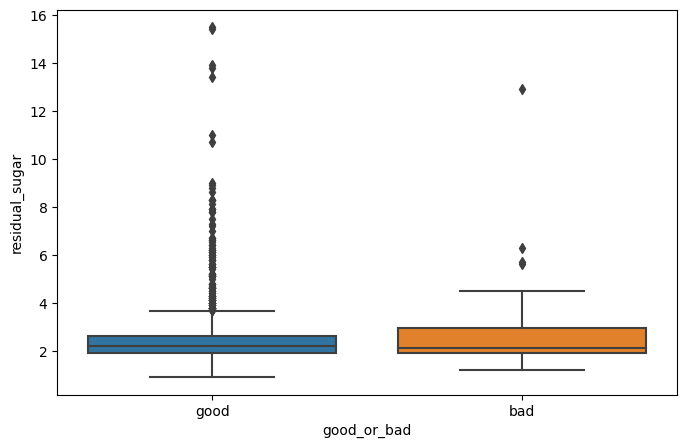

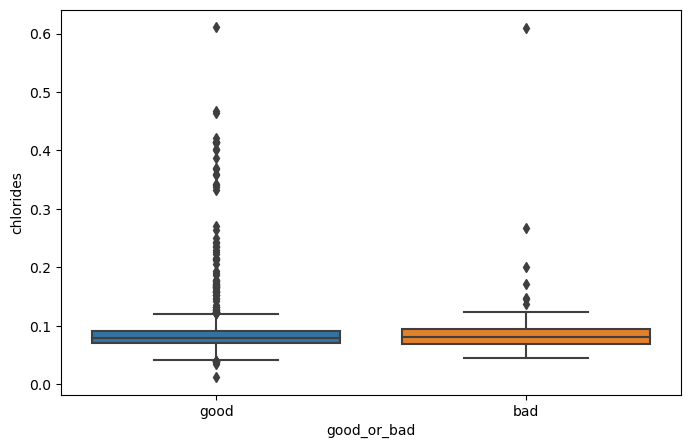

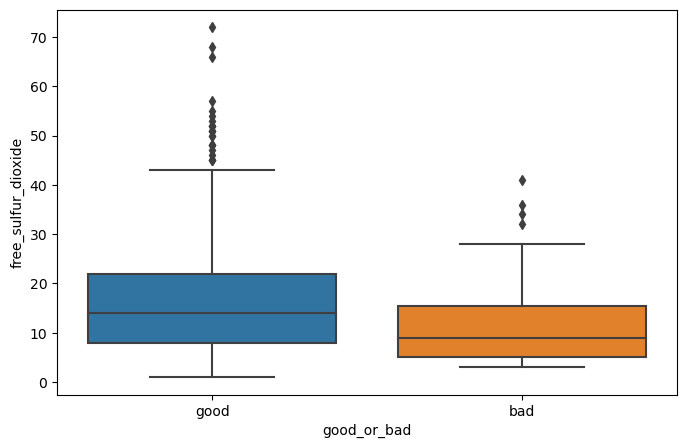

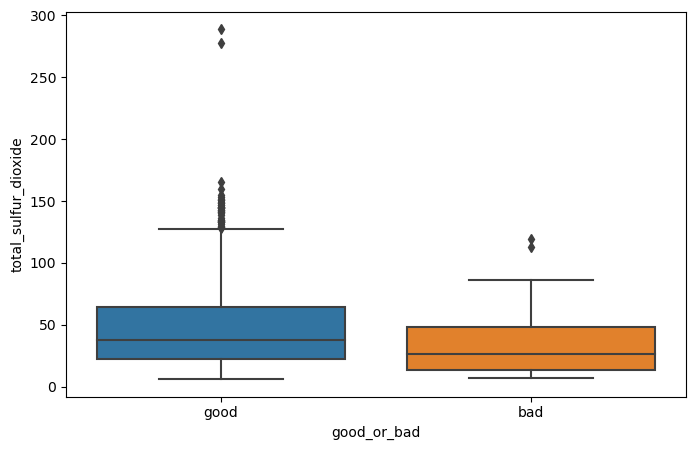

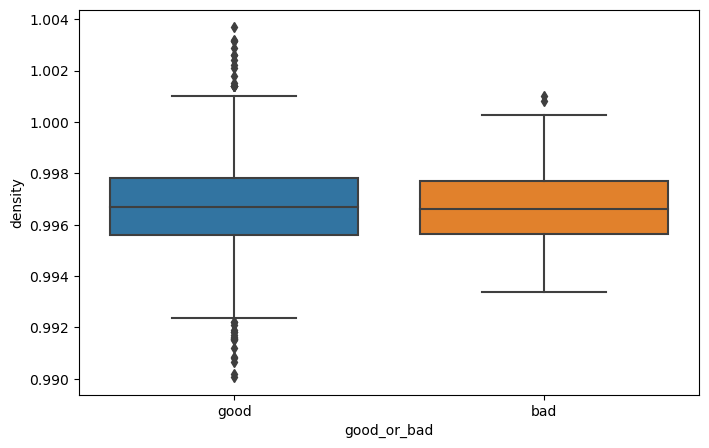

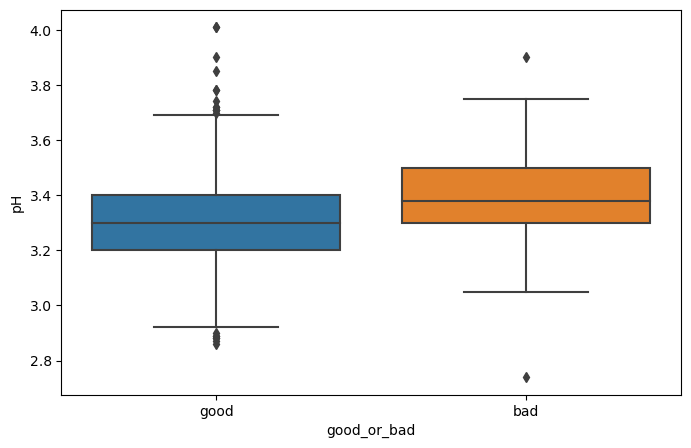

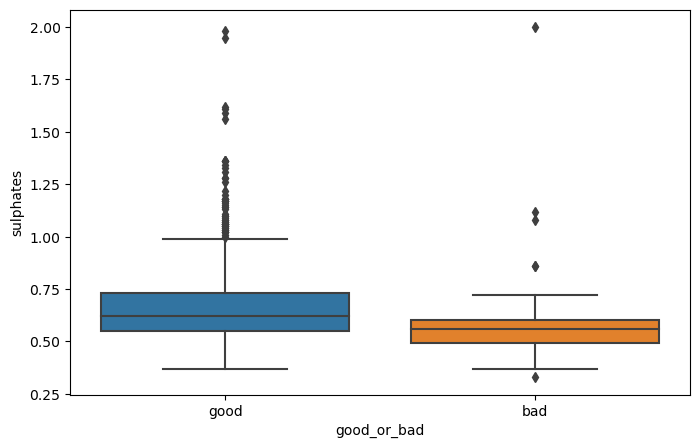

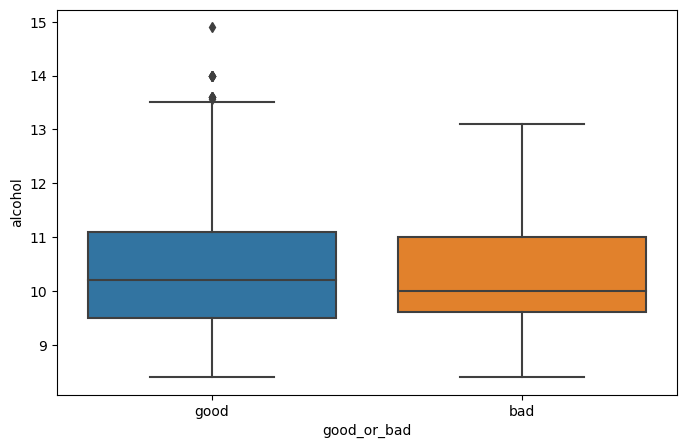

In [80]:


def boxplot_generator(df_column1, df_column2):
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    fig = sns.boxplot(x= df_column1, y= df_column2)
    if not os.path.exists("/Users/barry//CodeAcademy/Scrap/boxplots_red"):
        os.makedirs("/Users/barry/CodeAcademy/Scrap/boxplots_red")
    plt.savefig(f'/Users/barry/CodeAcademy/Scrap/boxplots_red/{df_column2.name}')
    plt.show()

red_cols_interest = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
for val in red_cols_interest:
    boxplot_generator(red_copy.good_or_bad, red_copy[val])


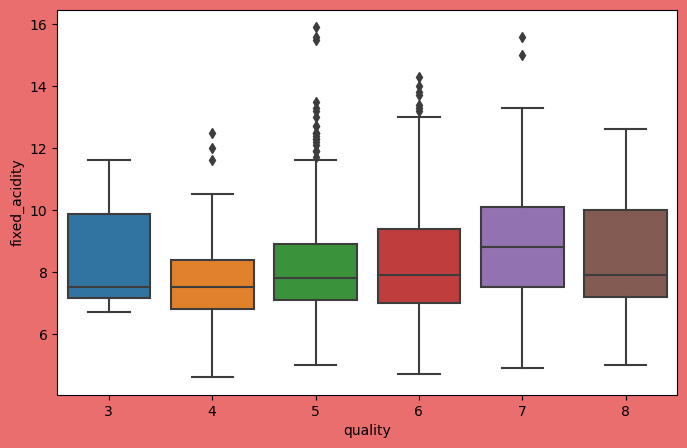

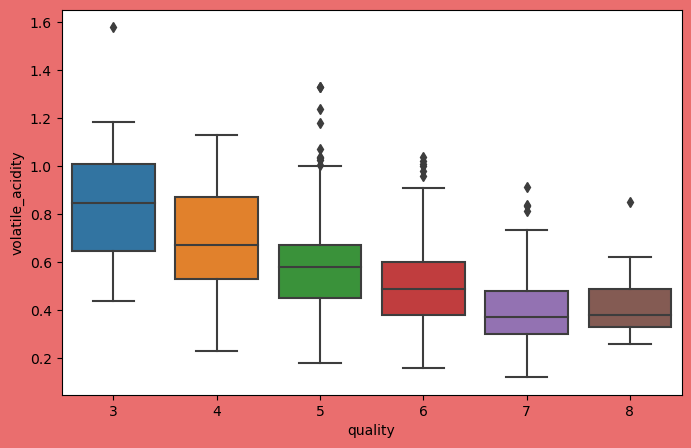

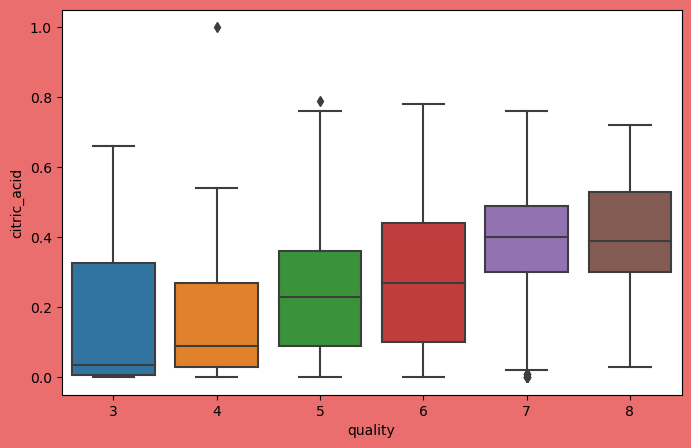

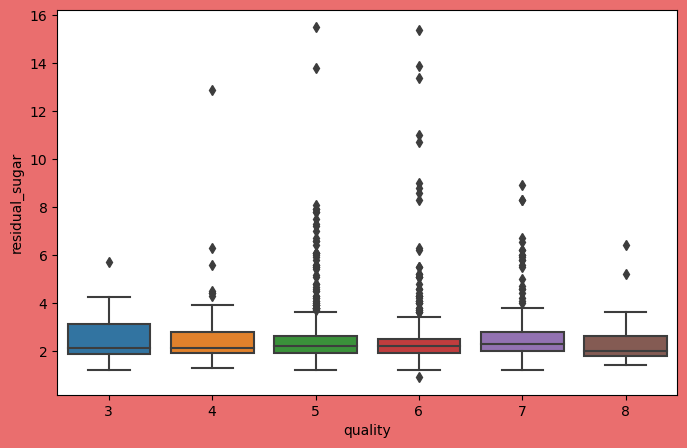

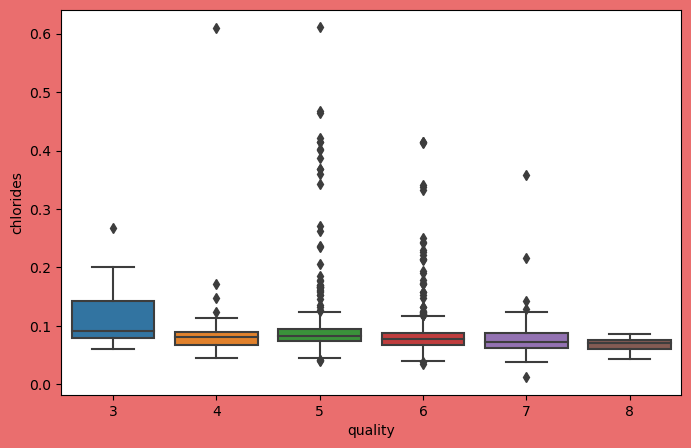

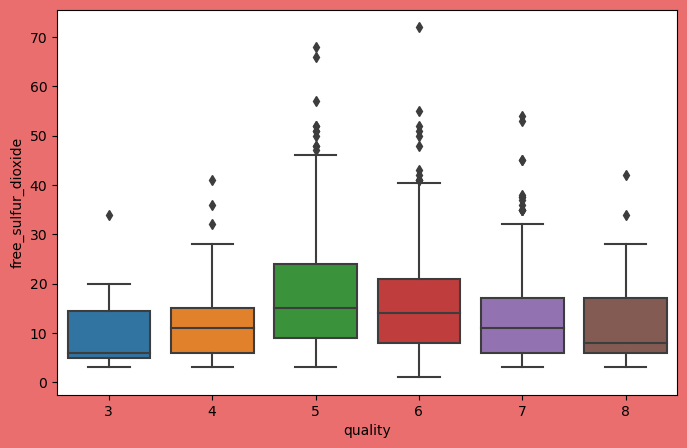

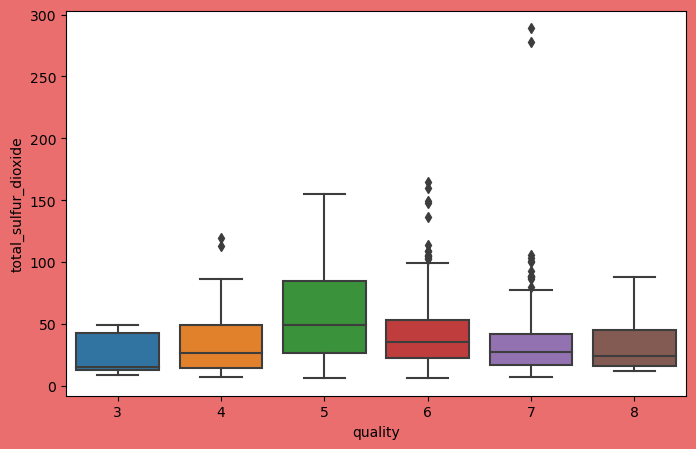

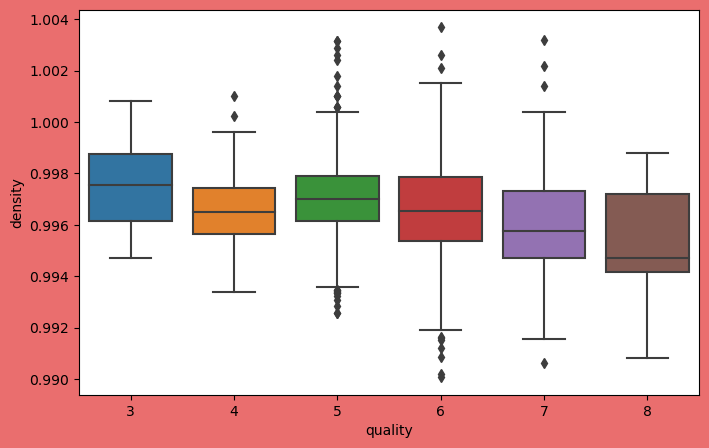

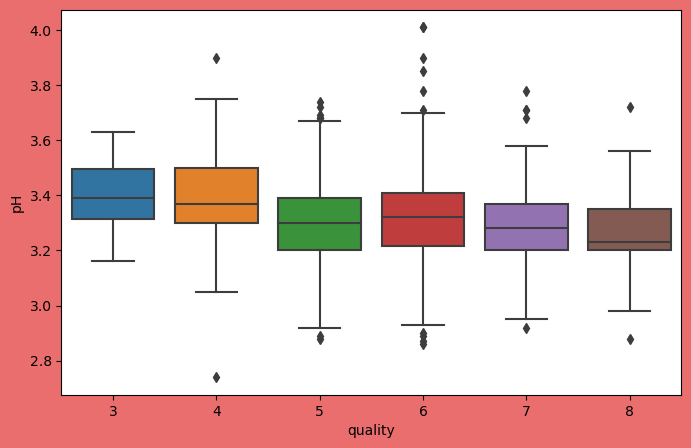

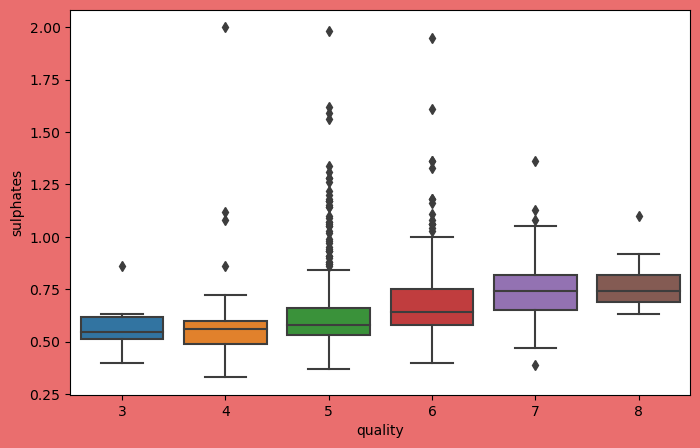

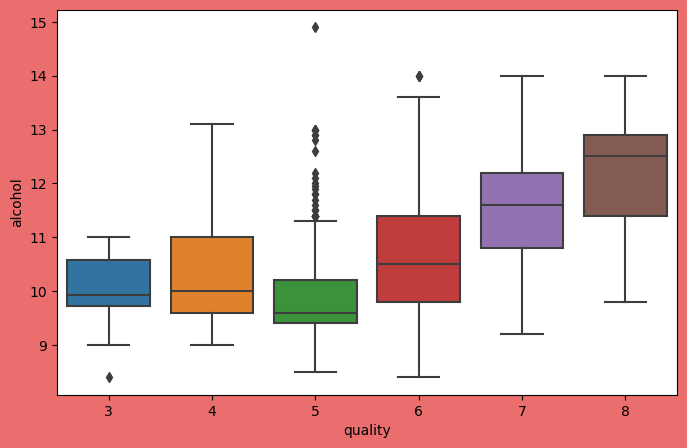

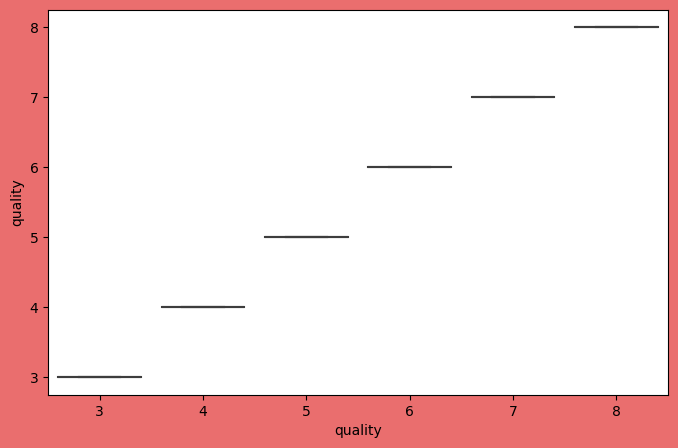

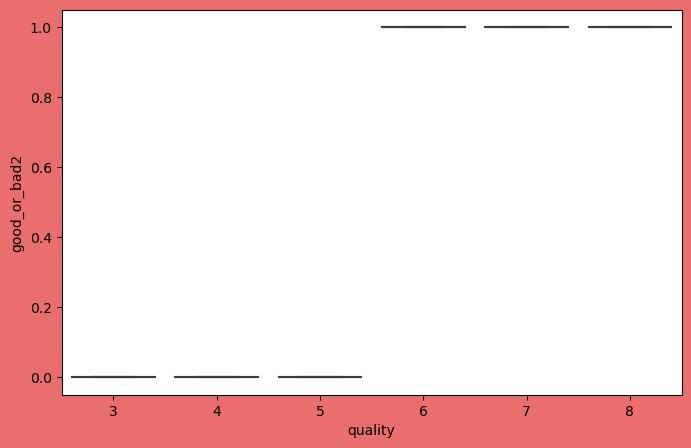

In [156]:

def boxplot_generator(df_column1, df_column2):
    fig, axs = plt.subplots(1, 1, figsize=(8, 5))
    fig.set_facecolor('#ea6e6e')

    fig = sns.boxplot(x= df_column1, y= df_column2)
    plt.show()
    
for val in red_copy.columns:
    try:
        boxplot_generator(red_copy['quality'], red_copy[val])
    except:
        pass

i want a scatter plot of quality to sulphates. But i want to also colour the dots by hue - hopeful by quality_label

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


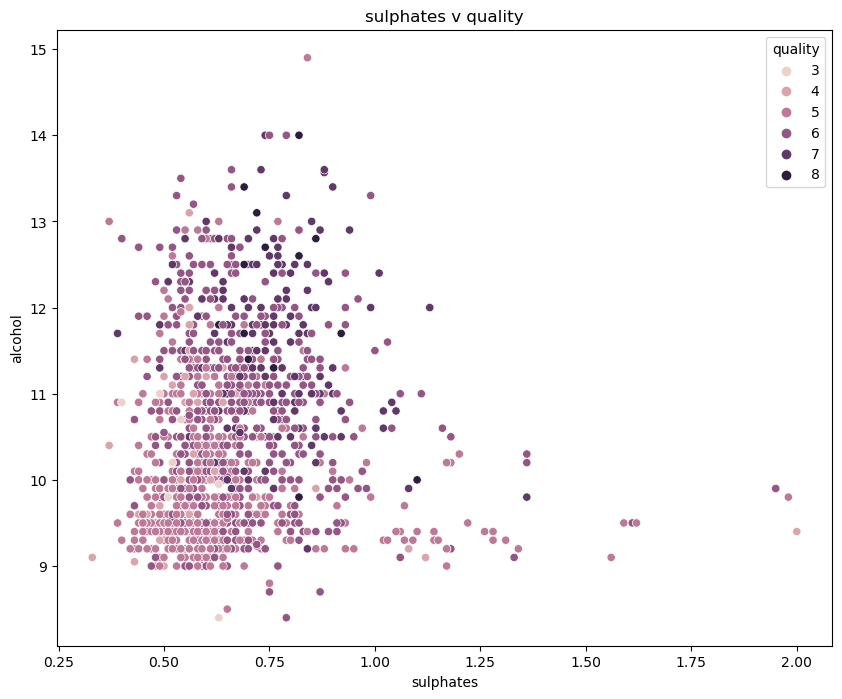

In [43]:
print(red_copy.columns)
plt.figure(figsize= (10,8))
sns.scatterplot(x= red_copy.sulphates, y =red_copy.alcohol, hue= red_copy.quality)
plt.title(f'sulphates v quality')
plt.show()

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


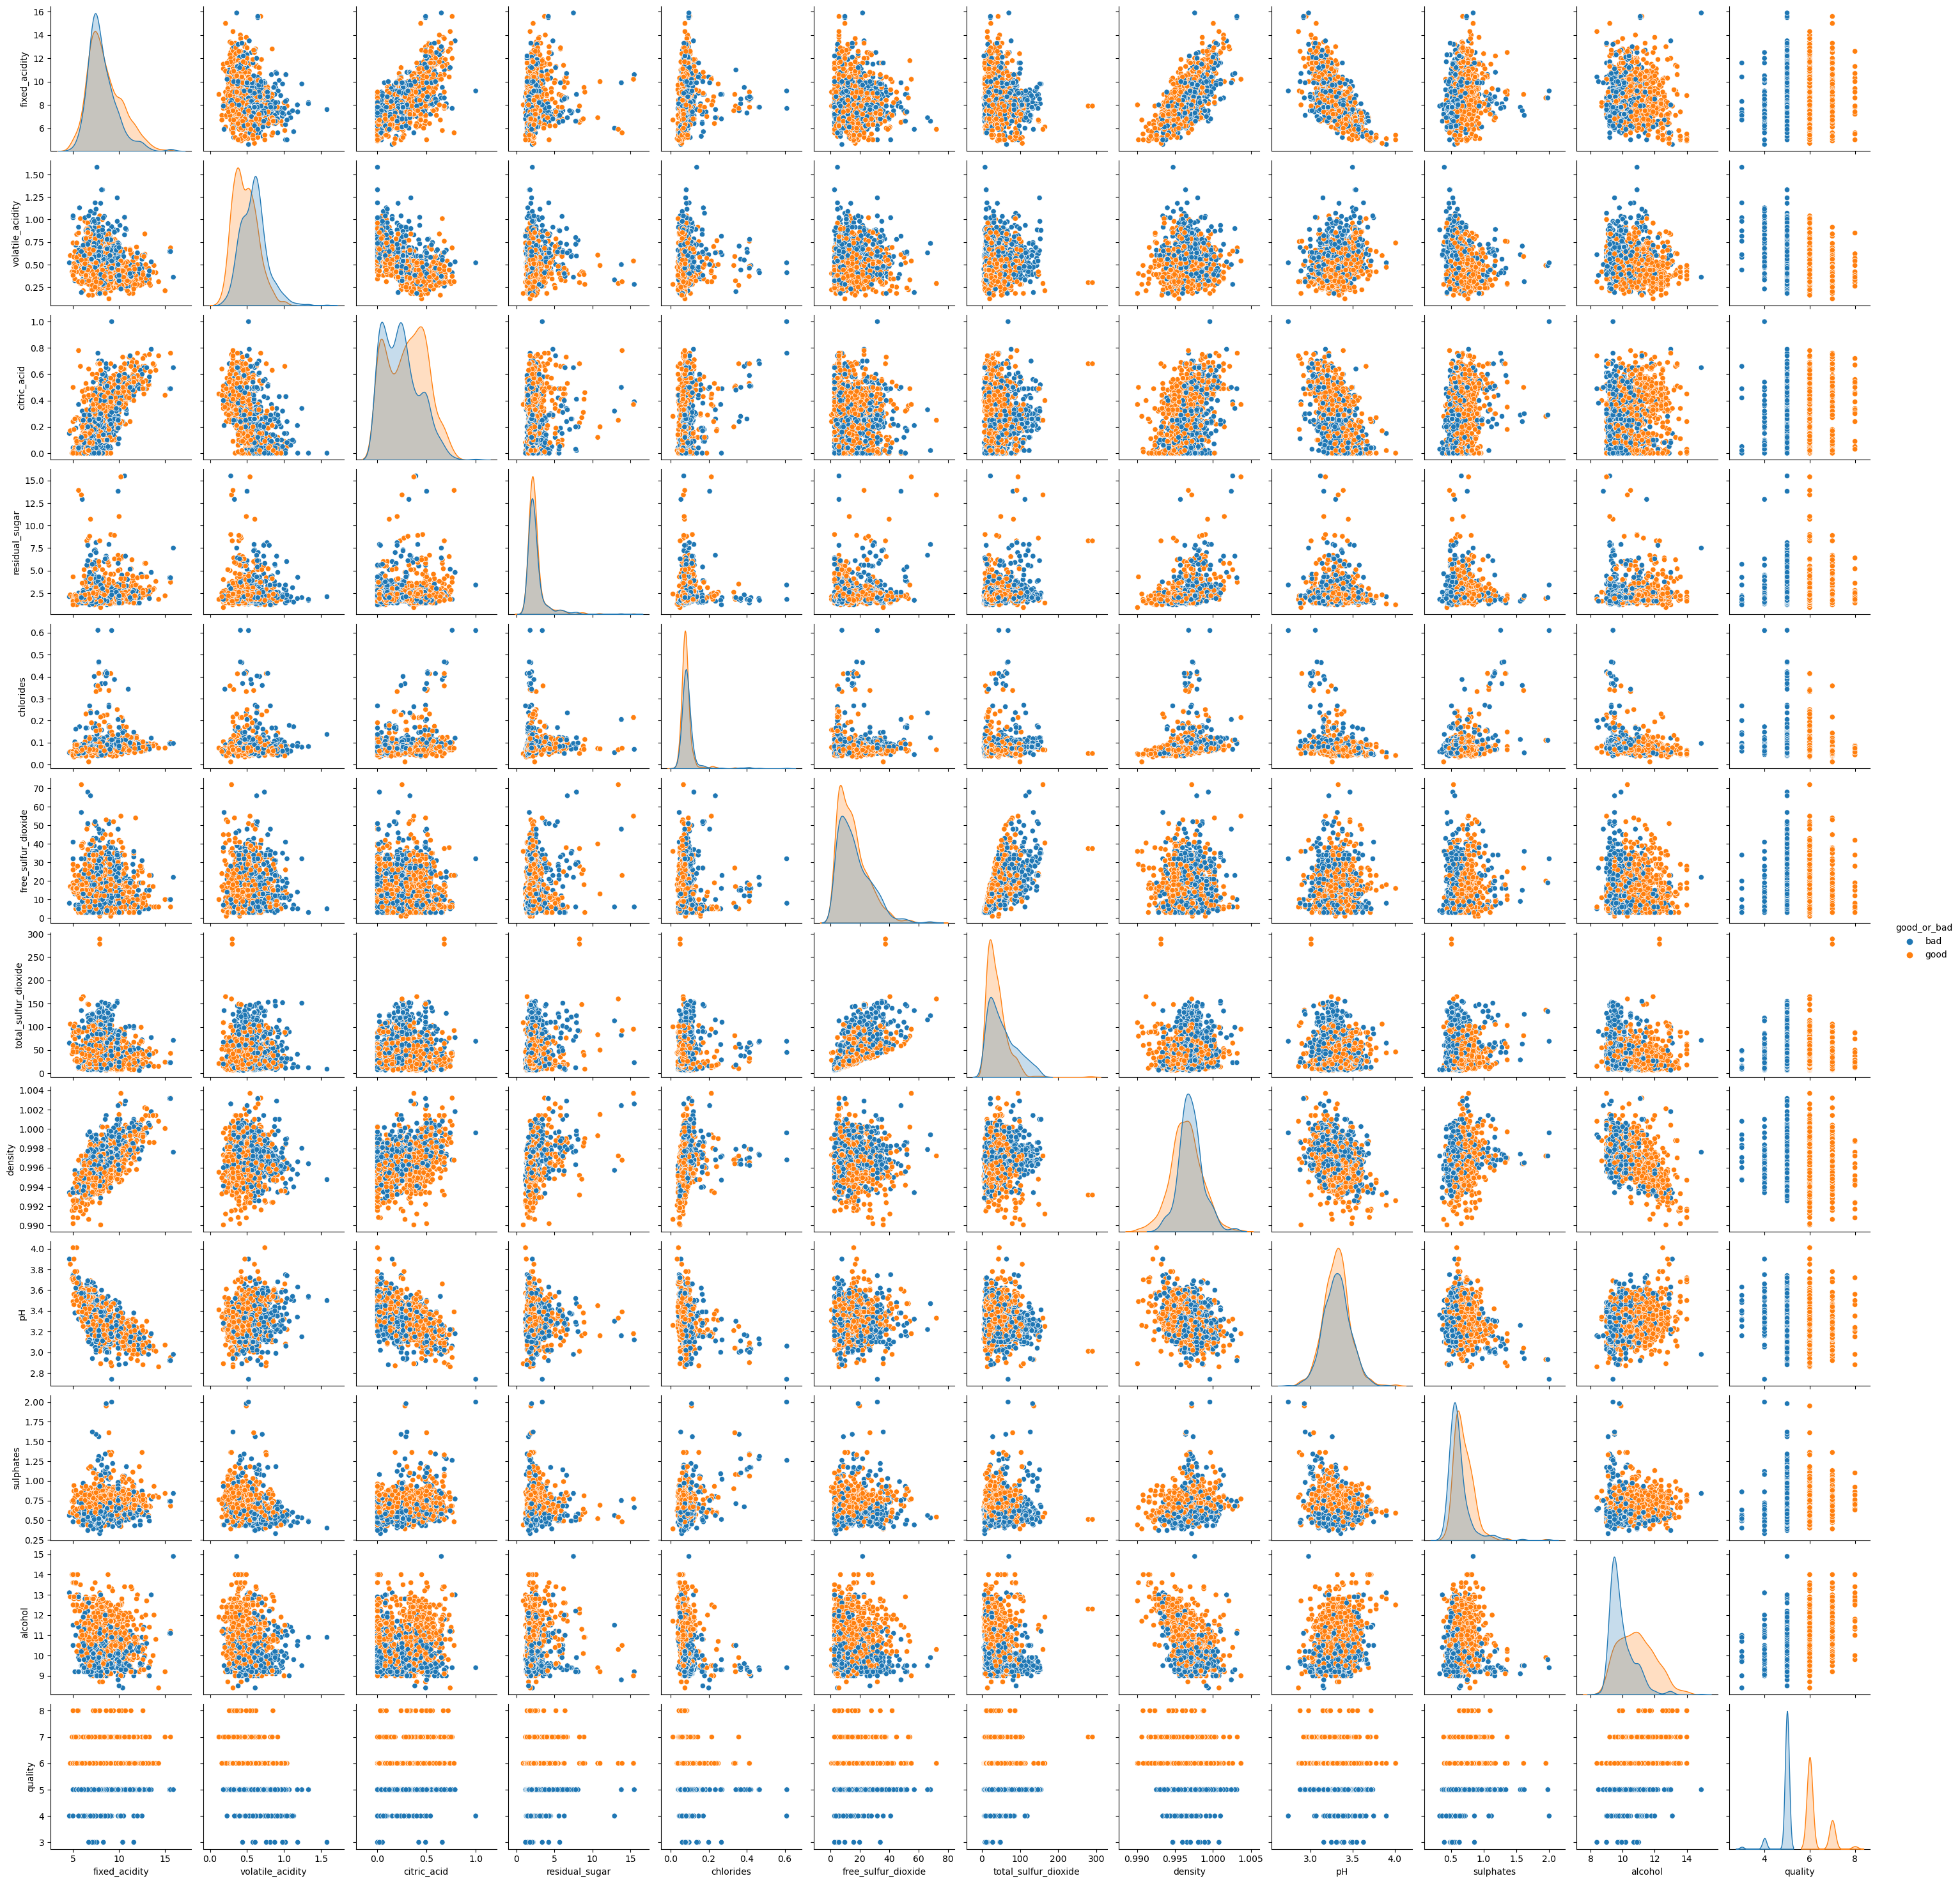

In [46]:
"""pair plotting hued by good_or_bad"""
sns.pairplot(red_copy, hue= 'good_or_bad')
plt.show()

/Users/barry/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


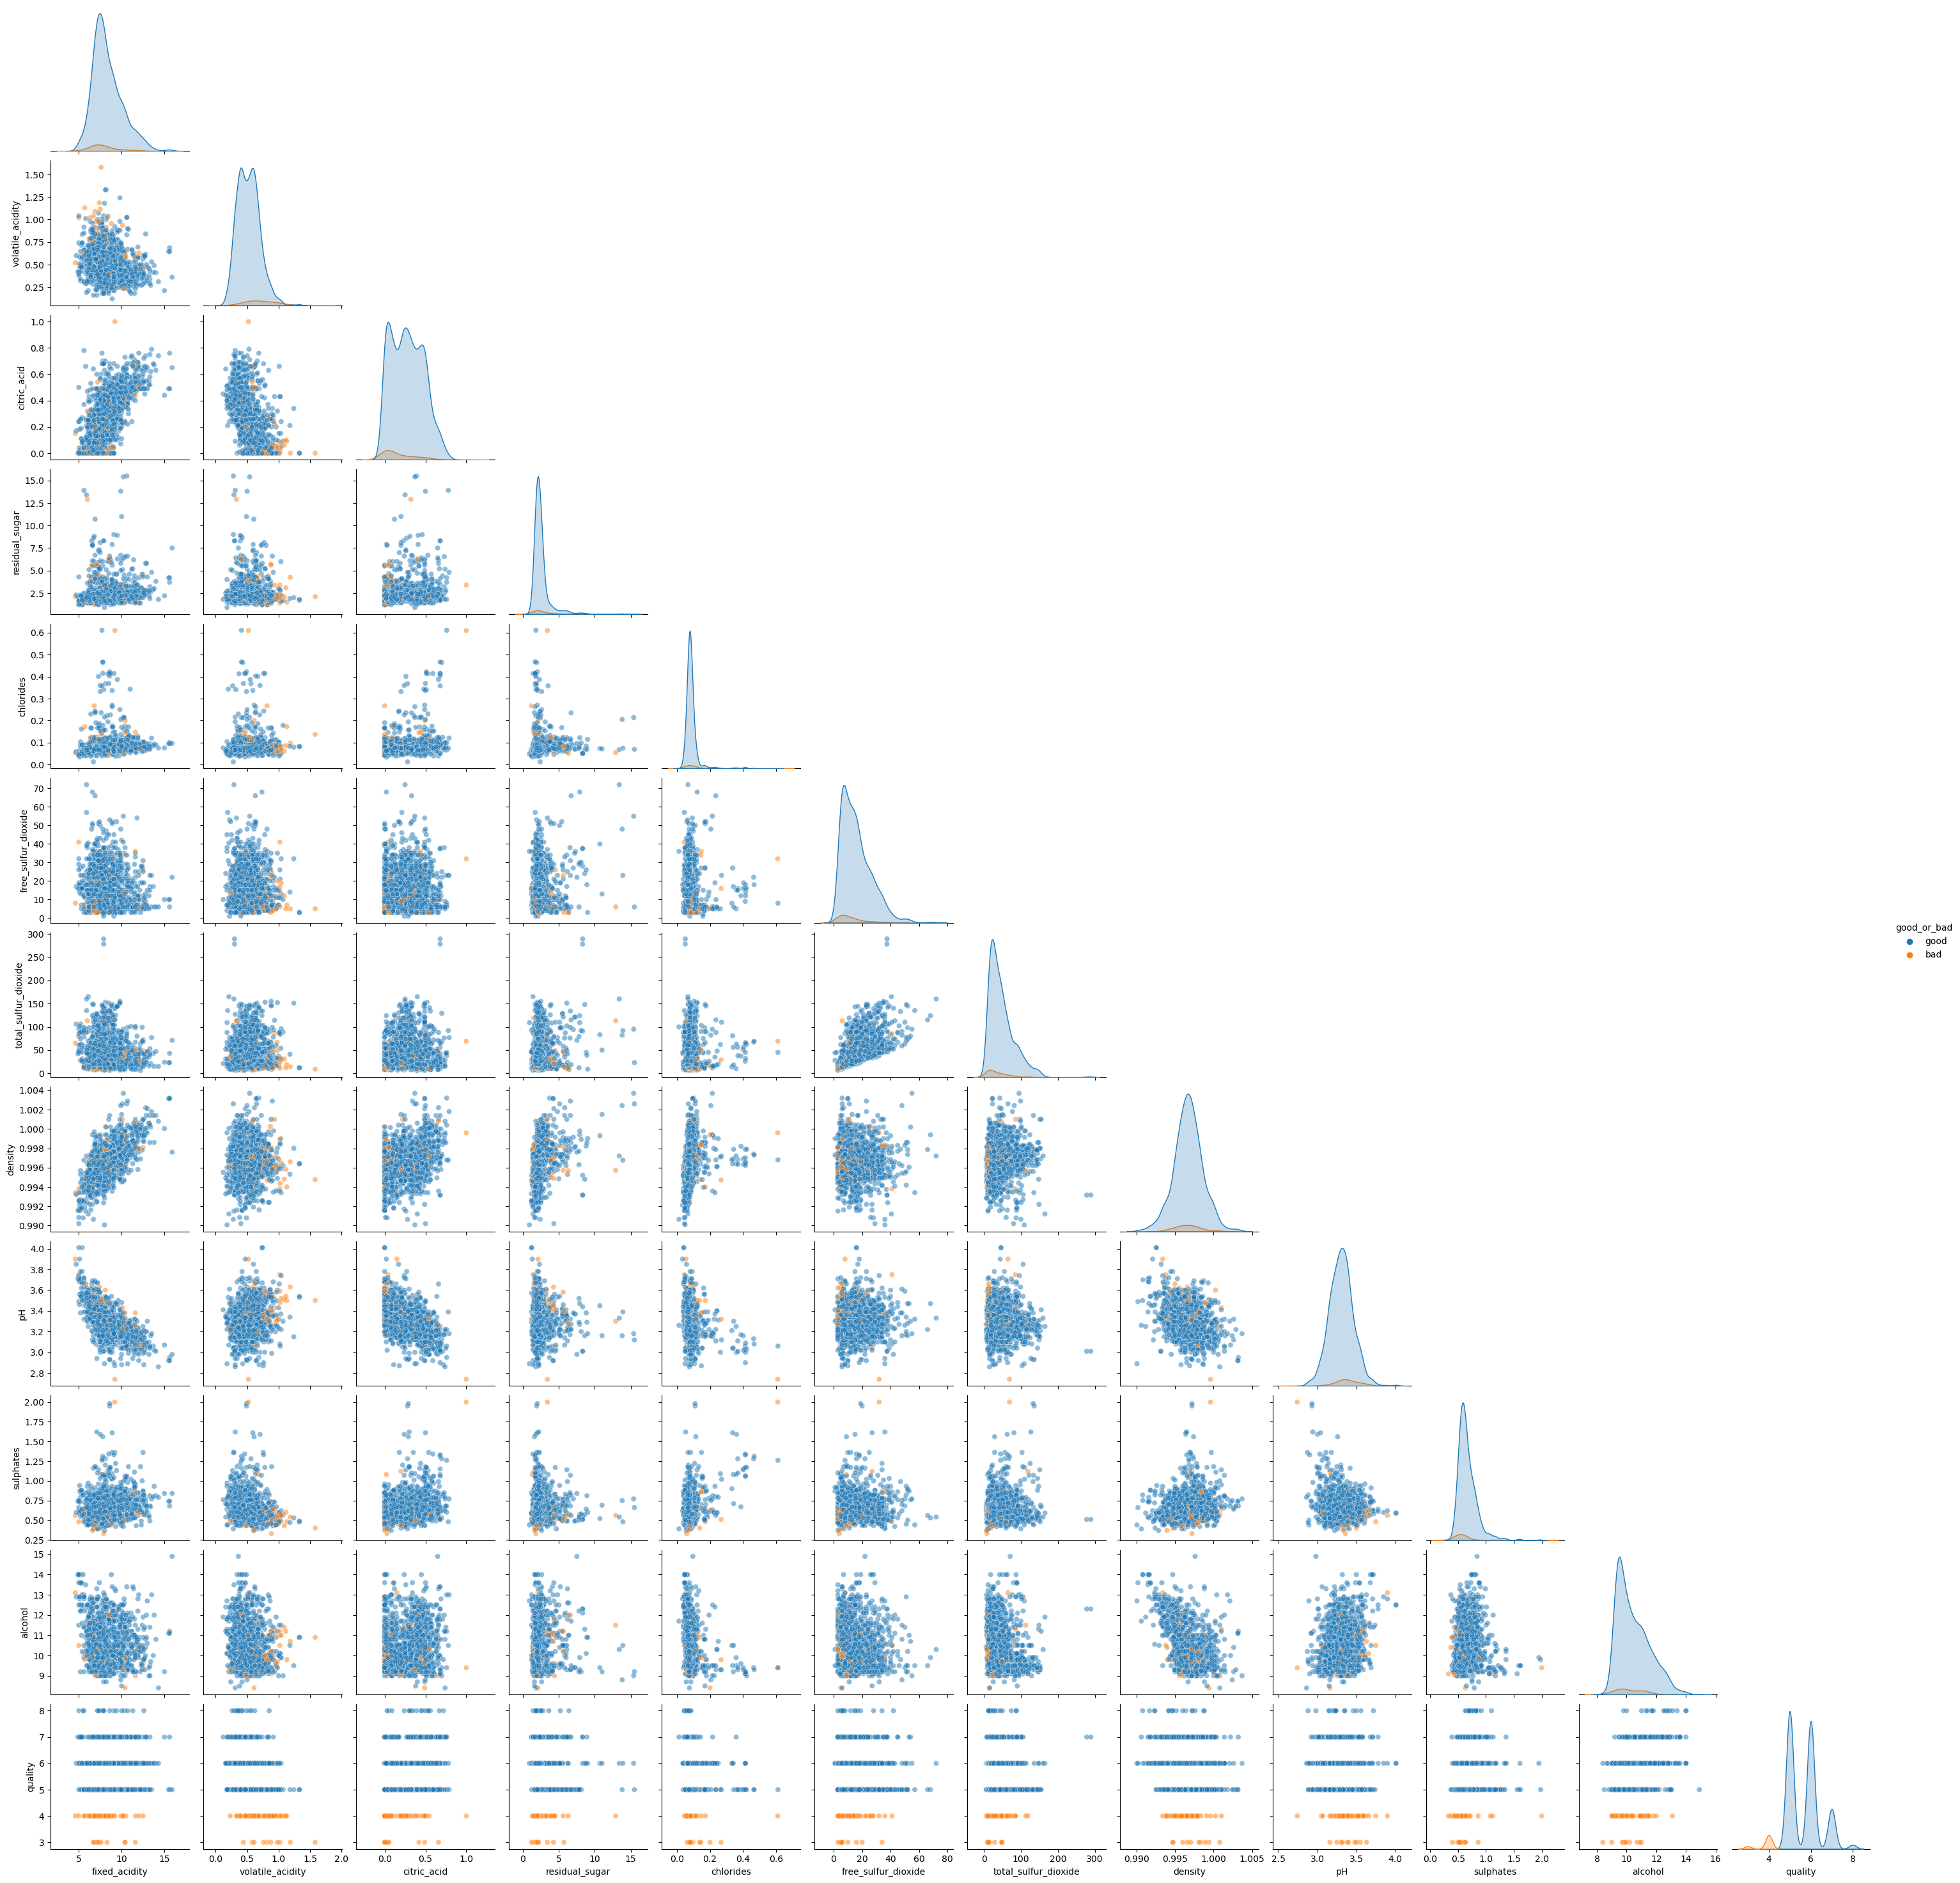

In [61]:
sns.pairplot(red_copy, hue= 'good_or_bad', plot_kws={'alpha': 0.5}, corner = True)
plt.show()

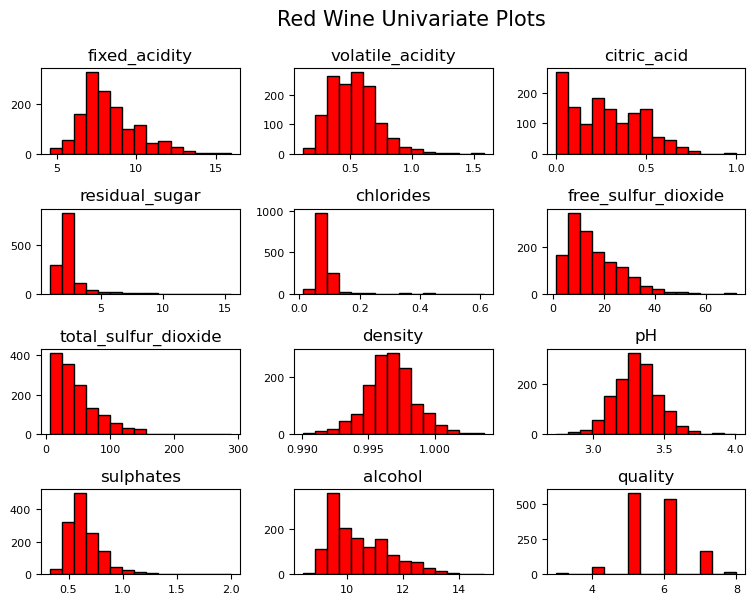

In [65]:
red_copy.hist(bins=15, color='red', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

rt = plt.suptitle('Red Wine Univariate Plots', x=0.65, y=1.25, fontsize=15)

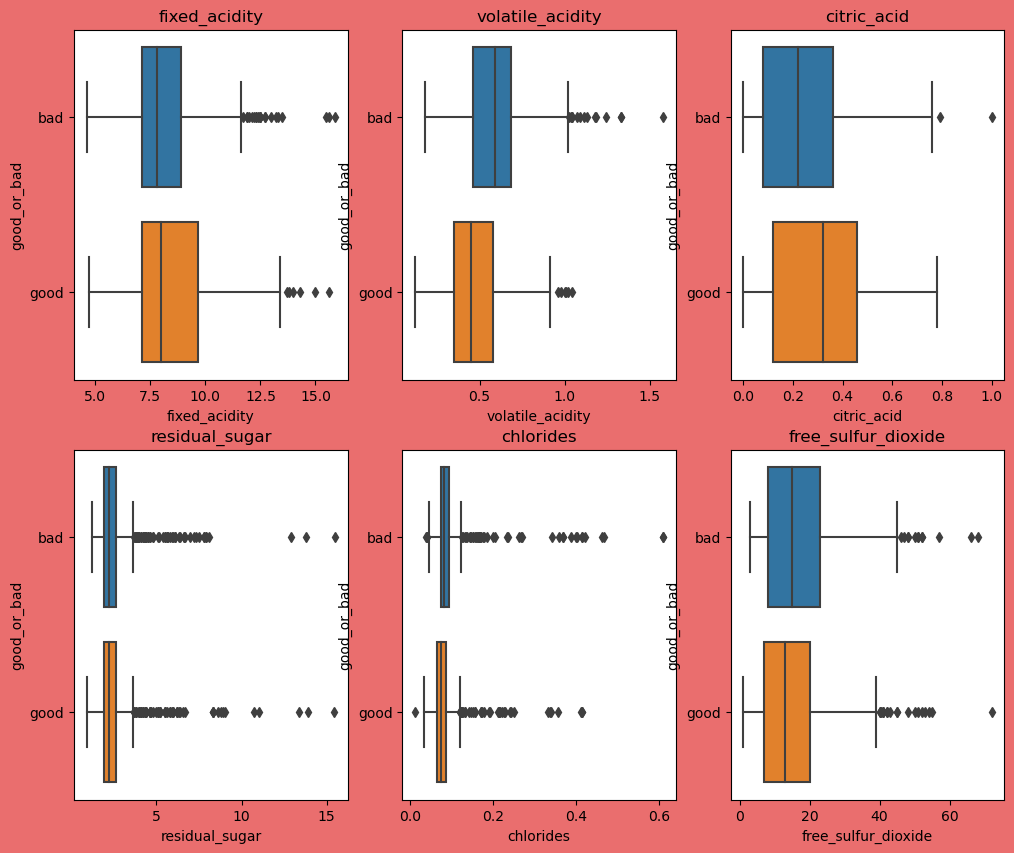

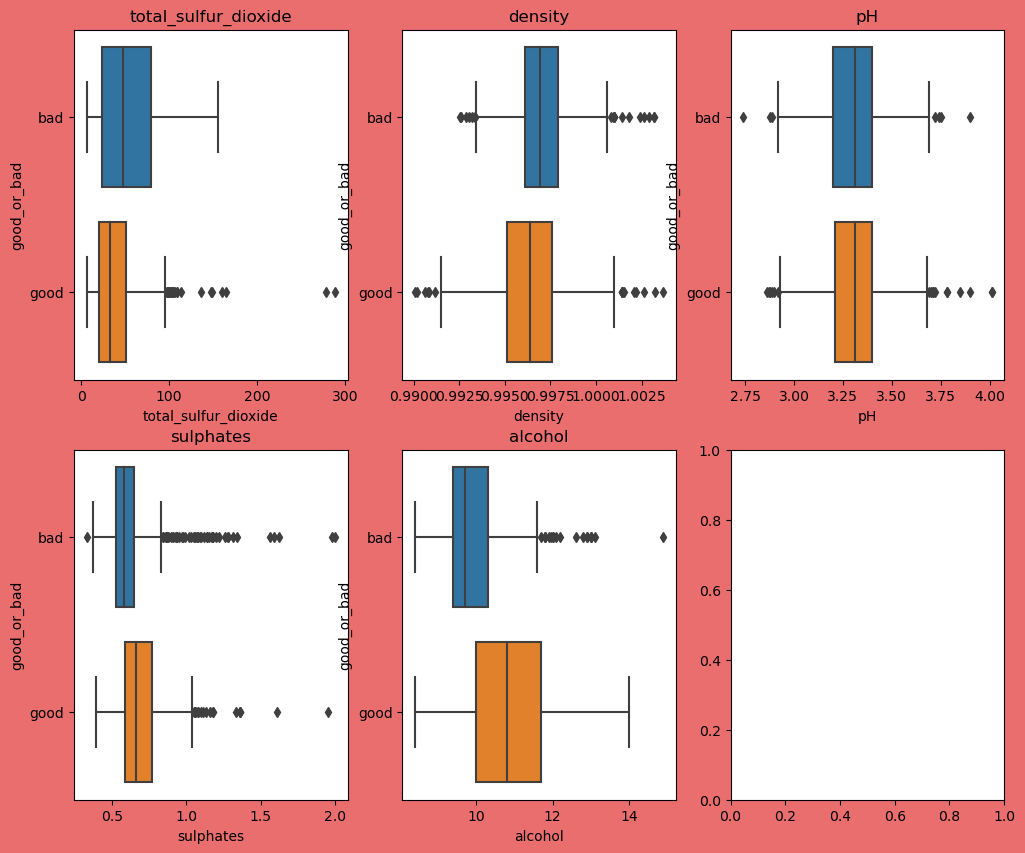

In [120]:


def boxplot_generator3(lst_cols):
    num_cols = len(lst_cols)
    
    num_rows = (num_cols //3) + (num_cols %2)
    fig, axs = plt.subplots(num_rows, 3, figsize = (12, 5 *num_rows))
    fig.set_facecolor('#ea6e6e')
    axs = axs.flatten()
    for i, var_of_i in enumerate(lst_cols):
        ax = axs[i]
        sns.boxplot(x = red_copy[var_of_i], y = red_copy.good_or_bad, ax = ax)
        #ax.set_facecolor(red_color)
        ax.set_title(f'{var_of_i}')        

boxplot_generator3(red_cols_interest[:6])
boxplot_generator3(red_cols_interest[6:])


how many good or bad wines do i have

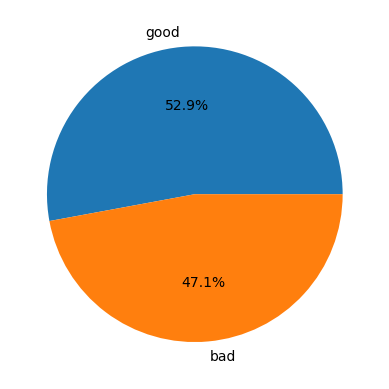

In [122]:
plt.pie(red_copy.good_or_bad.value_counts(), labels= red_copy.good_or_bad.value_counts().index, autopct='%1.1f%%')
plt.show()

lets make a heatmap

[Text(0.5, 0, 'fixed_acidity'),
 Text(1.5, 0, 'volatile_acidity'),
 Text(2.5, 0, 'citric_acid'),
 Text(3.5, 0, 'residual_sugar'),
 Text(4.5, 0, 'chlorides'),
 Text(5.5, 0, 'free_sulfur_dioxide'),
 Text(6.5, 0, 'total_sulfur_dioxide'),
 Text(7.5, 0, 'density'),
 Text(8.5, 0, 'pH'),
 Text(9.5, 0, 'sulphates'),
 Text(10.5, 0, 'alcohol'),
 Text(11.5, 0, 'quality')]

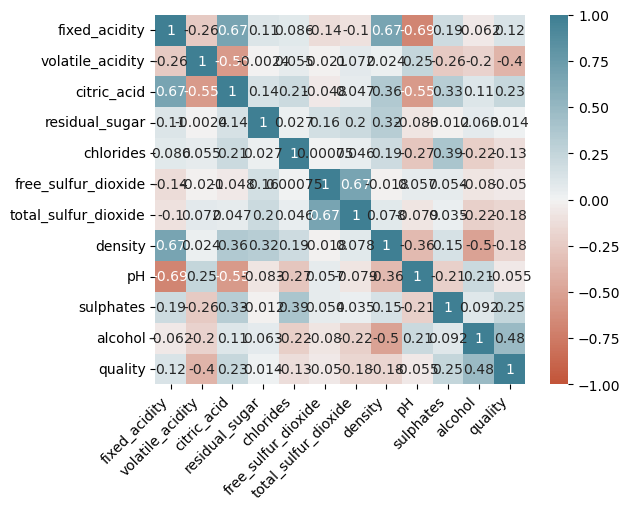

In [166]:

corr = red_copy.iloc[:, :-1].corr()
ax = sns.heatmap(corr, vmin = -1, vmax=1, center=0, cmap = sns.diverging_palette(20,220, n=200), square = True, annot= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  good_or_bad2  
0      9.4        5             0  
1      9.8    

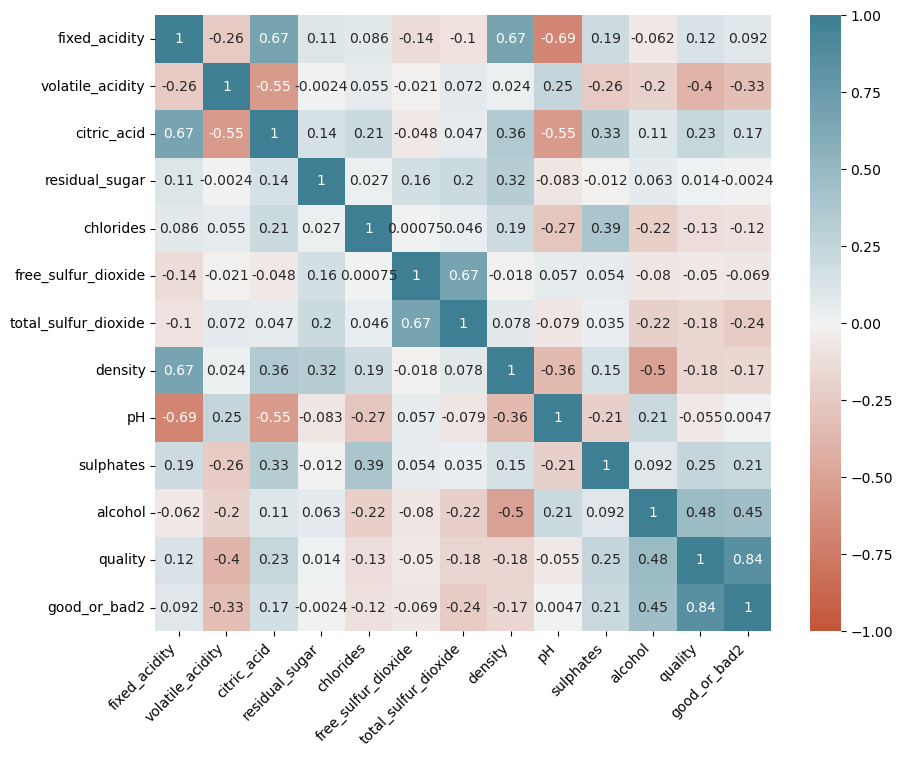

In [168]:
category_column = 'good_or_bad'
#red_copy['good_or_bad2'] = red_copy.good_or_bad.map({'good': 1, 'bad':0})
#red_copy =red_copy.drop('good_or_bad', axis = 1)
correlation_matrix = red_copy.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmin = -1, vmax=1, center=0, cmap = sns.diverging_palette(20,220, n=200), square = True, annot= True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
print(red_copy.head())


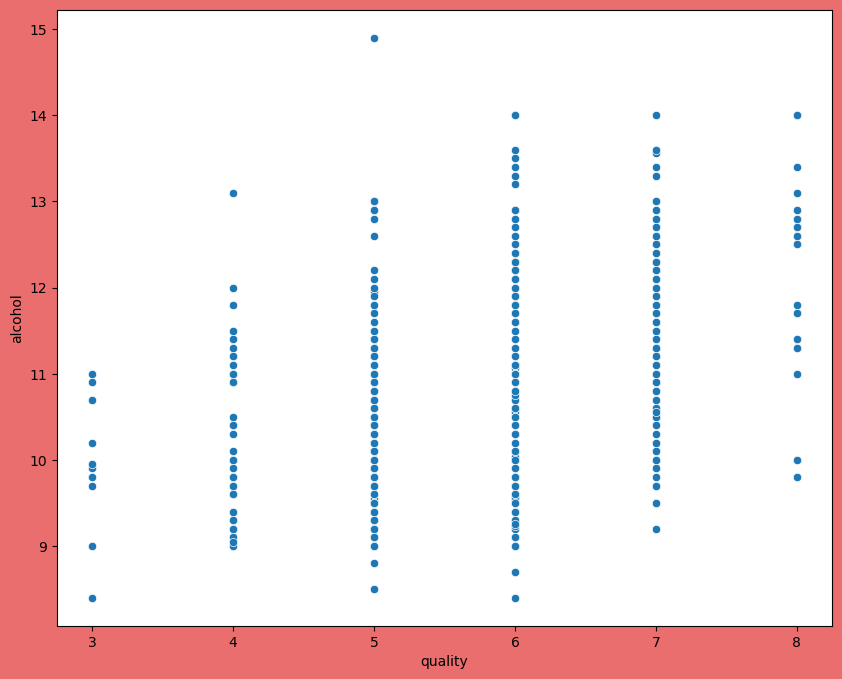

In [164]:
fig, axs = plt.subplots(1, 1, figsize = (10,8))
fig.set_facecolor('#ea6e6e')
sns.scatterplot(x = red_copy.quality, y = red_copy.alcohol)

plt.show()

In [165]:
print(correlation_matrix)

                      fixed_acidity  volatile_acidity  citric_acid  \
fixed_acidity              1.000000         -0.255124     0.667437   
volatile_acidity          -0.255124          1.000000    -0.551248   
citric_acid                0.667437         -0.551248     1.000000   
residual_sugar             0.111025         -0.002449     0.143892   
chlorides                  0.085886          0.055154     0.210195   
free_sulfur_dioxide       -0.140580         -0.020945    -0.048004   
total_sulfur_dioxide      -0.103777          0.071701     0.047358   
density                    0.670195          0.023943     0.357962   
pH                        -0.686685          0.247111    -0.550310   
sulphates                  0.190269         -0.256948     0.326062   
alcohol                   -0.061596         -0.197812     0.105108   
quality                    0.119024         -0.395214     0.228057   
good_or_bad2               0.091761         -0.327195     0.167903   

                   

In [169]:
print(red_copy.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
5                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality  good_or_bad2  
0      9.4        5             0  
1      9.8    

In [174]:
from scipy import stats

F, p = stats.f_oneway(
    red_copy[red_copy['good_or_bad2'] == 0]['alcohol'],
red_copy[red_copy['good_or_bad2'] == 1]['alcohol']
)


print('ANOVA test for mean alcohol levels across wine samples with different quality ratings')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean alcohol levels across wine samples with different quality ratings
F Statistic: 337.2873861749577 	p-value: 1.8727584833521097e-67


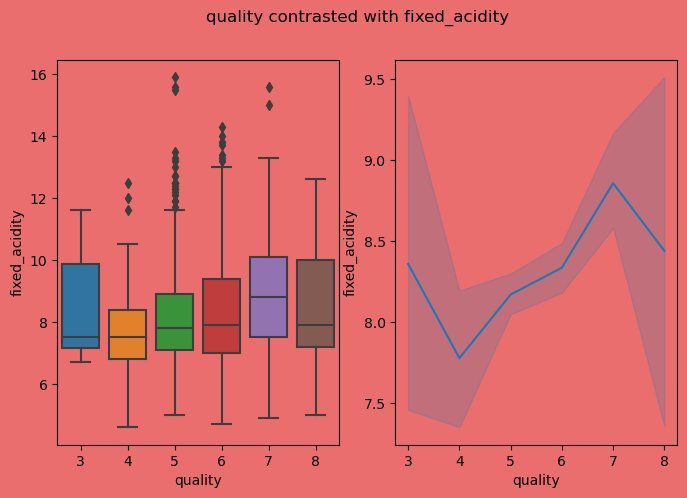

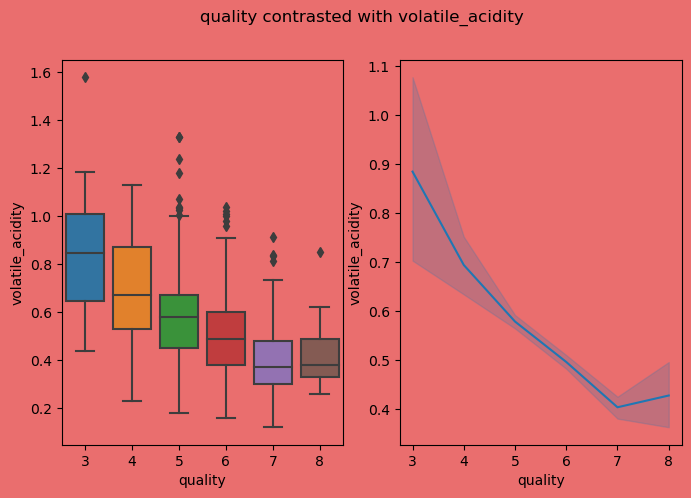

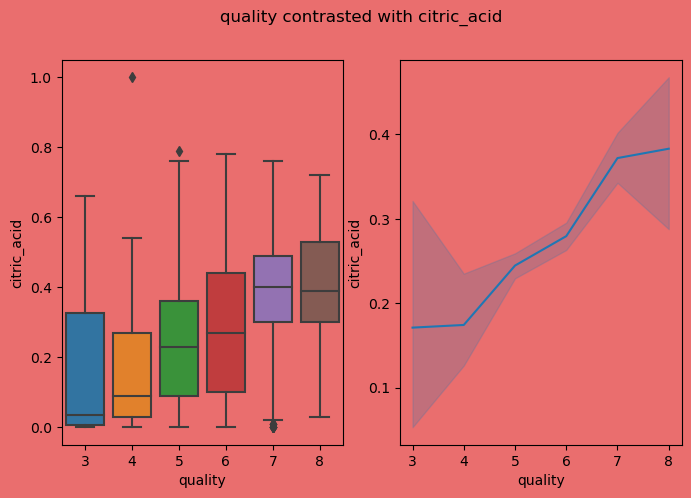

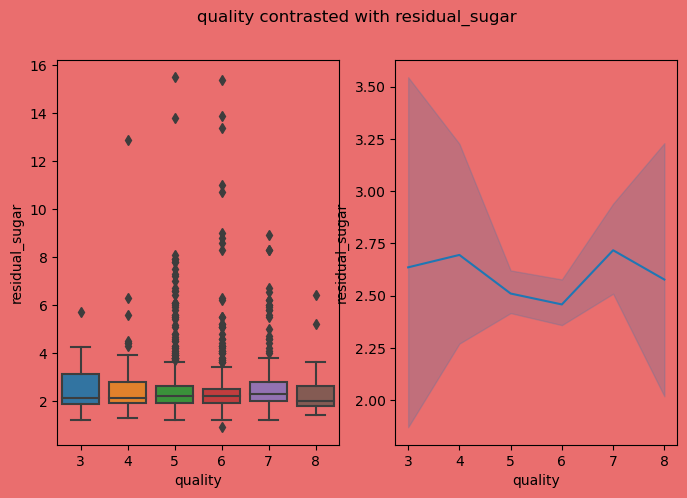

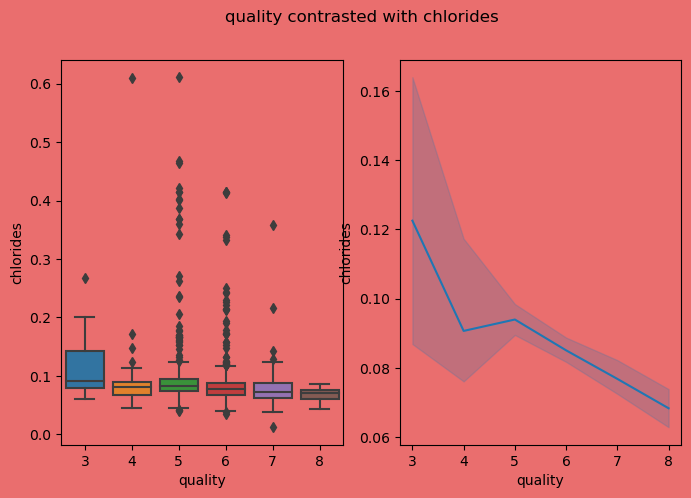

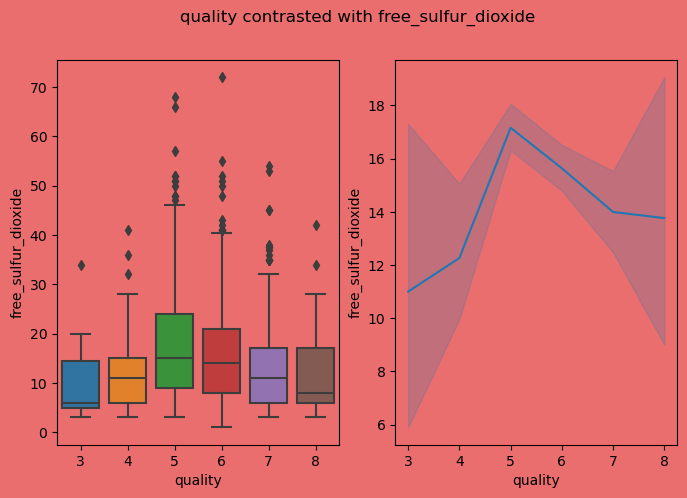

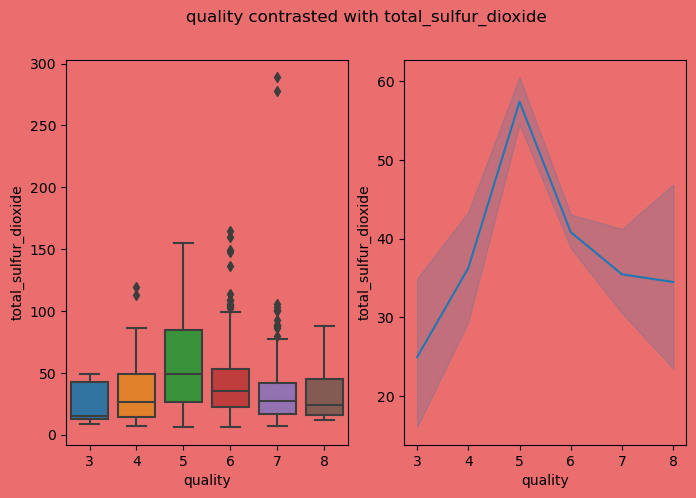

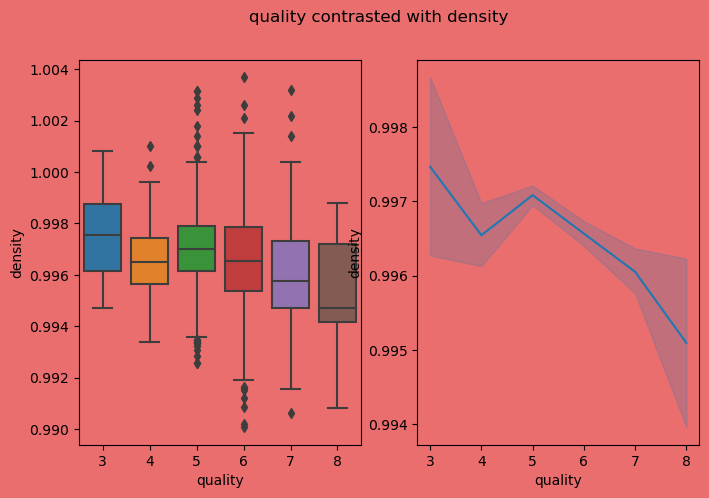

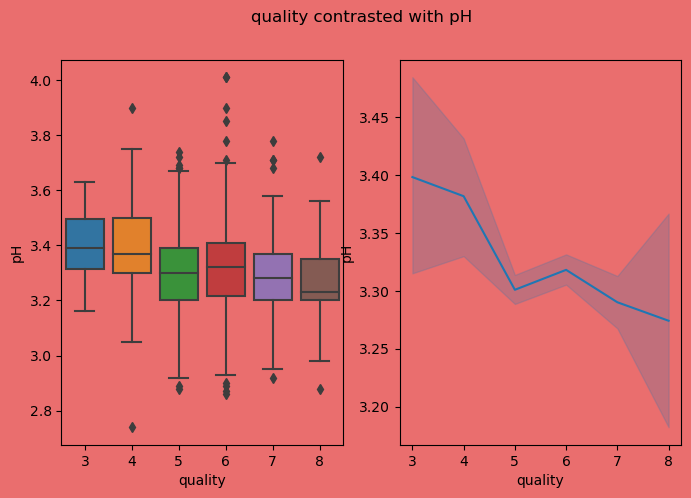

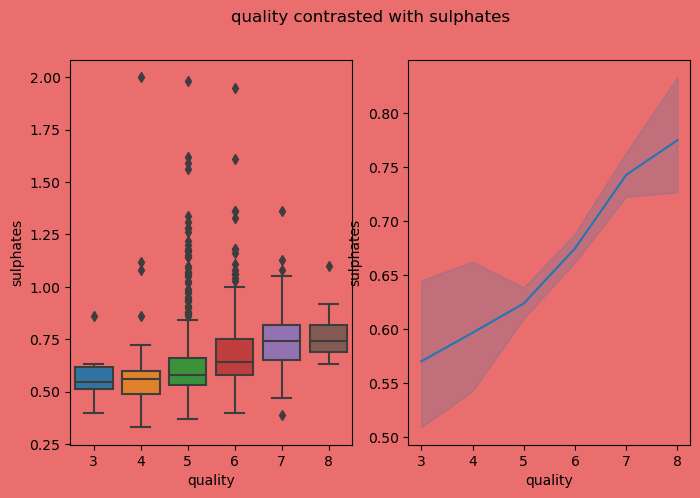

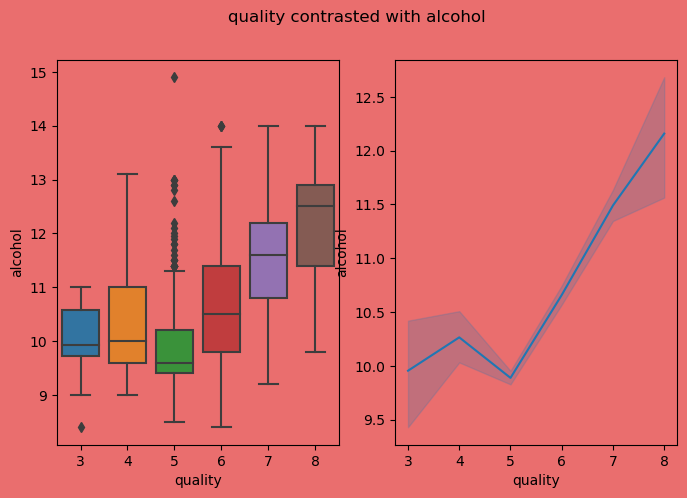

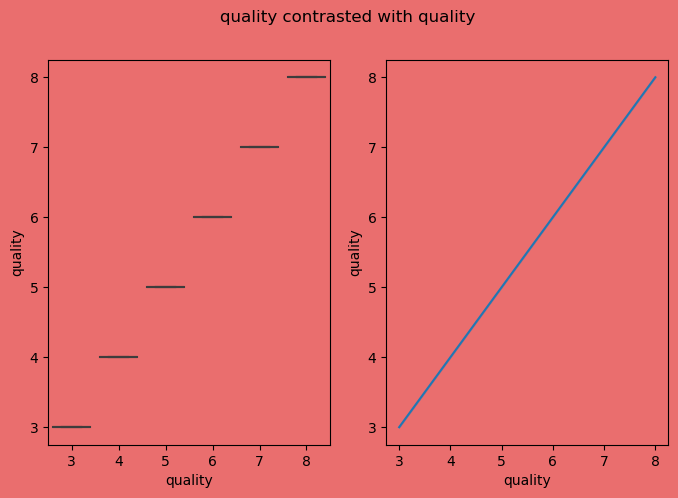

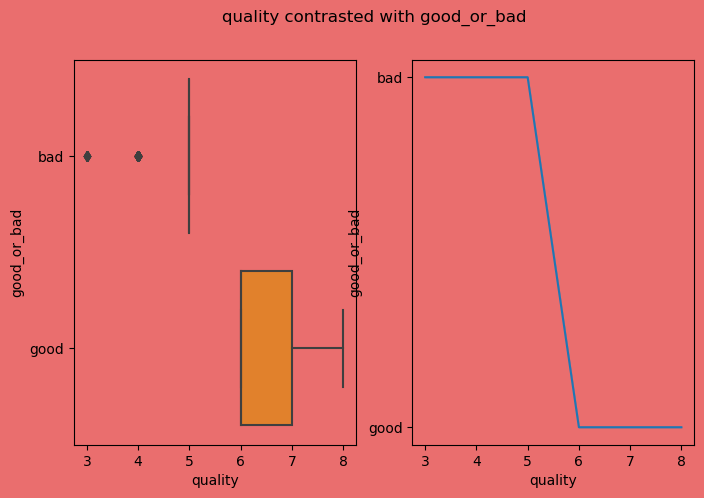

In [188]:
def boxplot_generator4(df_column1, df_column2):
    fig, axs = plt.subplots(1, 2, figsize=(8, 5))
    fig.suptitle(f'{df_column1.name} contrasted with {df_column2.name}')
    #fig1.set_facecolor('#ea6e6e')
    fig.set_facecolor('#ea6e6e')

    fig1 = sns.boxplot(x= df_column1, y= df_column2, ax = axs[0])
    axs[0].set_facecolor(red_color)
    axs[1].set_facecolor(red_color)
    fig2 = sns.lineplot(x = df_column1, y = df_column2, ax = axs[1])
    
    plt.show()
    
for val in red_copy.columns:
    try:
        boxplot_generator4(red_copy['quality'], red_copy[val])
    except:
        pass